In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
from math import log2
from collections import Counter 

In [2]:
with open('input.txt') as f:
    text = f.read()

In [5]:
print(len(text))

1115393


In [3]:
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [6]:
character = "a"
#convert to binary
binary = bin(ord(character))[2:].zfill(8)
print(binary)


01100001


In [7]:
chars =sorted(list(set(text) ))
vocab_size = len(chars)
print('Vocab size:', vocab_size)

Vocab size: 65


In [8]:

char_freqs = Counter(text)
char_freqs["Unk"] = 3e-4

In [9]:
#top 10 most frequent characters
print(char_freqs.most_common(6))

[(' ', 169892), ('e', 94611), ('t', 67009), ('o', 65798), ('a', 55507), ('h', 51310)]


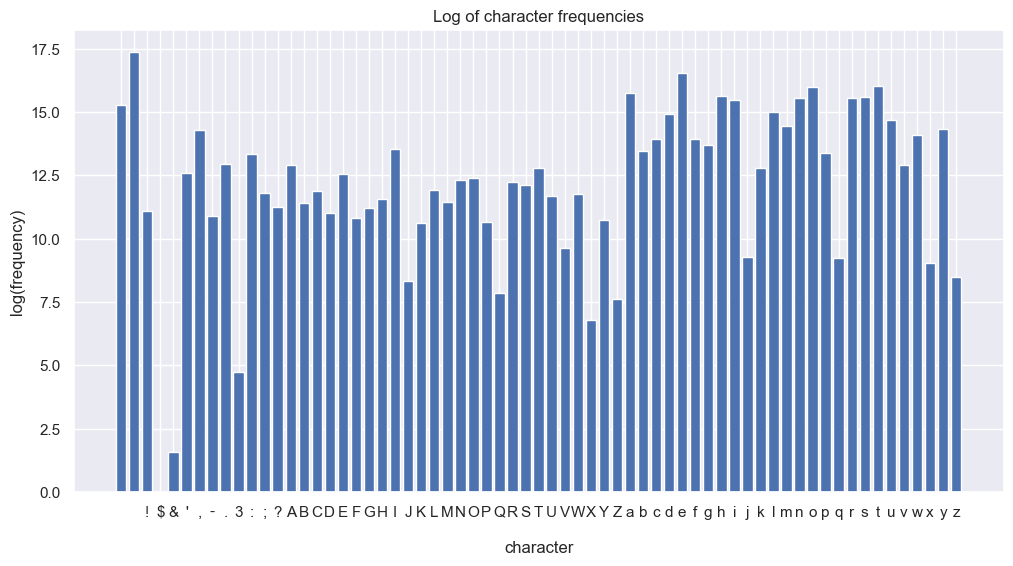

In [104]:
sns.set()   
plt.figure(figsize=(12, 6))
plt.title('Log of character frequencies')
plt.ylabel('log(frequency)')
plt.xlabel('character')
plt.bar(chars, [log2(char_freqs[c]) for c in chars])
plt.show()

# Entropy 

 $$h(p) = \sum p_i \log(1/p_i)$$

<Axes: >

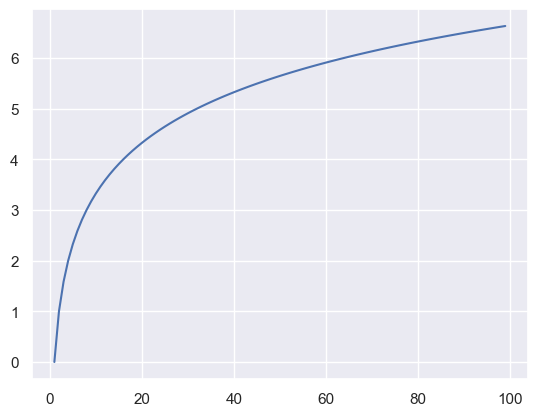

In [8]:
#show a plot of log in seaborn 
x = [j for j in range(1, 100)]
y = [ log2(j) for j in x]
sns.lineplot(x=x,y=y)


In [11]:
def entropy(freqs):
    total = sum(freqs)
    return -sum( (f/total)*log2(f/total) for f in freqs)
entropy(char_freqs.values())

4.779353259825184

In [12]:
def encode(character):
    order = ord(character)
    #convert to binary
    binary = bin(order)[2:]
    return binary

In [13]:
def compression_length(text):
    return sum(len(encode(char)) for char in text)


In [14]:
print(compression_length(text))
print(compression_length(text)/len(text))

7463438
6.6913079067198735


# Huffman Encoding 

We can actually achieve close to the entropy bound

In [15]:
total = sum(char_freqs.values())
char_probs = {k:f/total for k,f in char_freqs.items()}

In [16]:
class Trellis:
    """ A trellis for huffman encoding. """
    
    def __init__(self,char_probs):
        
        self.char_probs = char_probs 
        self.encoding = {k:'' for k in char_probs.keys()}

        self.bubbles = {(k,):v for k,v in char_probs.items()}
        
    def get_smallest_2(self):
        """ find keys of two minimum value in self.bubbles """

        smallest = sorted(self.bubbles, key=self.bubbles.get)[:2]
        return smallest

    def merge_smallest(self,x,y):
        """ merge two smallest keys in self.bubbles """
        
        
        #pop returns the value 
        self.bubbles[x+y] = self.bubbles.pop(x) + self.bubbles.pop(y)
      

    def update_encoding(self):
        """ Single step in huffman encoding. """
        smallest,smallest2 = self.get_smallest_2()
        
        for char in smallest:
            self.encoding[char] ='0' + self.encoding[char]
        for char in smallest2:
            self.encoding[char] = '1' +  self.encoding[char] 
        self.merge_smallest(smallest,smallest2)
        
    def encode(self):
        """ Run huffman encoding. """
        while len(self.bubbles) > 1:
            self.update_encoding()
        self.finder =  {v:k for k,v in self.encoding.items()}
        return self.encoding
    
    def encoder(self,char):
        """ Encode a single character. """
        if char in self.encoding:
            return self.encoding[char]
        else:
            return self.encoding['Unk']
    
    def get_encoding(self, text):
        """ Encode text using huffman encoding. """
        
        return "".join([self.encoder(char) for char in text])
    
    def decode_step(self,text,ind):
        """ Decode text using huffman encoding. """
        
        binary = ''
        for j in range(ind,len(text)):
            digit = text[j]
            binary += digit
            if binary in self.finder:
                return binary,self.finder[binary]
            
    def decode(self,coding):
        """ Decode text using huffman encoding. """

        text = ''
        ind = 0 
        while ind < len(coding):
            binary,char = self.decode_step(coding,ind)
        
            ind += len(binary)
            text += char

        return text 
            
       
    

In [17]:
huff = Trellis(char_probs)
encoder = huff.encode()

In [18]:
encoding = {k:encoder[k] for k in sorted(encoder, key=lambda x : len(encoder[x]))}

In [19]:
for k,v in encoding.items():
    for k2,v2 in encoding.items():
        if k != k2:
            if len(v) > len(v2):
                if char_probs[k] > char_probs[k2]:
                    print(k,k2,v,v2)


In [20]:
encoded_shakespeare = huff.get_encoding(text)

In [231]:
decoding = huff.decode(encoded_shakespeare)

In [232]:
#average length of encoding
sum(len(e) for e in encoded_shakespeare)/len(encoded_shakespeare)

1.0

In [233]:
#total length of encoding
sum(len(e) for e in encoded_shakespeare)

5372884

In [23]:
#read RomeoAndJuliet.txt

with open('RomeoAndJuliet.txt') as f:
    val_text  = f.read()


In [24]:
val_encoding = huff.get_encoding(val_text)

In [28]:
val_encoding[:100]

'1010010101001011110110111100111110010011111011001101010100000110011010010101111110100010100101000101'

In [29]:
quote = "To be, or not to be, that is the question"
huff.get_encoding(quote)

'010100001111101111000111010011111001110000110111110111100011010000111110111100011101001111101000001001001000110101110001110100000101110110101010000100011011100001100010111011111111'

In [25]:
len(val_encoding)/len(val_text)

4.802894485729983